In this notebook (created using CRC OnDemand) I will attempt to use unsupervised machine learning and clustering to more deeply examine my dataset.

In [15]:
import numpy as np
import pickle
import pandas as pd
import sklearn              
import matplotlib.pyplot as plt
import seaborn as sns      
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style='darkgrid', font_scale=1.3)

import nltk
nltk.data.path.append('/ihome/nhan/naraehan/shared_data/nltk_data') 
nltk.word_tokenize('Hello, world...!!')

['Hello', ',', 'world', '...', '!', '!']

In [17]:
epath = '/ihome/ling2340_2022s/rsb76/'
fanfics = pd.read_pickle(epath + 'fanfiction_df.pkl')
fanfics.head()

,Filename,Rating,Warning,Category,Fandom,Relationships,Characters,Additional,Text
0,1005380.html,Explicit,Creator Chose Not To Use Archive Warnings,M/M,Harry Potter - J. K. Rowling,"Sirius Black/Remus Lupin, James/Lily, Peter Pe...","Remus Lupin, Sirius Black, James Potter, Lily ...","Humor, Angst, First War with Voldemort",While we've done our best to make the core fun...
1,10057010.html,Mature,"No Archive Warnings Apply, Major Character Dea...",M/M,Harry Potter - J. K. Rowling,"Sirius Black/Remus Lupin, Sirius Black & Remus...","Remus Lupin, Sirius Black, James Potter, Lily ...","Marauders' Era, Marauders, Marauders Friendshi...",While we've done our best to make the core fun...
2,10074443.html,Explicit,No Archive Warnings Apply,M/M,"Batman (Movies - Nolan), Dark Knight Rises - F...",Bane (DCU)/John Blake,"Bane (DCU), John Blake","nightwing!blake, dub-con, Fanart, molesting ag...",While we've done our best to make the core fun...
3,1008747.html,Explicit,Underage,M/M,Harry Potter - J. K. Rowling,"Harry Potter/Voldemort, Harry Potter/Tom Riddl...","Harry Potter, Voldemort, Tom Riddle | Voldemor...","Angst, First Time, Work In Progress, Alternate...",While we've done our best to make the core fun...
4,10159223.html,Explicit,Rape/Non-Con,"F/M, Multi, F/F",Spider-Man (Comicverse),"Peter Parker/Calypso, Betty Brant/Peter Parker...","Peter Parker, Calypso, Betty Brant, Felicia Ha...","Adultery, Femdom, Seduction, Office Sex, Three...",While we've done our best to make the core fun...


In [18]:
fanfics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Filename       10054 non-null  object
 1   Rating         9762 non-null   object
 2   Warning        9762 non-null   object
 3   Category       9252 non-null   object
 4   Fandom         9762 non-null   object
 5   Relationships  9382 non-null   object
 6   Characters     9455 non-null   object
 7   Additional     9438 non-null   object
 8   Text           10054 non-null  object
dtypes: object(9)
memory usage: 707.0+ KB


As you can see, I have a varying number of non-null objects in each column. For better clustering, I'm going to drop rows that contain null objects, even though this will give me a smaller DataFrame.

In [19]:
fanfics = fanfics.dropna()
fanfics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 0 to 10053
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Filename       8450 non-null   object
 1   Rating         8450 non-null   object
 2   Warning        8450 non-null   object
 3   Category       8450 non-null   object
 4   Fandom         8450 non-null   object
 5   Relationships  8450 non-null   object
 6   Characters     8450 non-null   object
 7   Additional     8450 non-null   object
 8   Text           8450 non-null   object
dtypes: object(9)
memory usage: 660.2+ KB


Now to start clustering! Let's look at fandoms first.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.5, stop_words='english')

x = fanfics['Text']
y = fanfics['Fandom']

x_tfidf = tfidf_model.fit_transform(x, y)

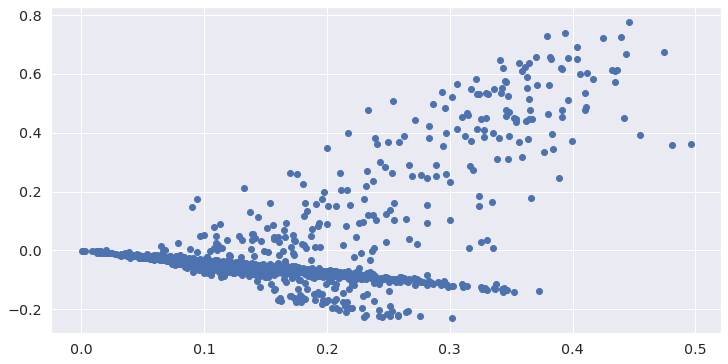

In [23]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)
x_svd = svd_model.fit_transform(x_tfidf,y)
plt.figure(figsize=(12,6))
plt.scatter(x_svd[:2000, 0], x_svd[:2000, 1])
plt.show()

So my data does have a shape! I was honestly not entirely sure that it would. I'm not sure what the different groups we see here correlate to, but I'm going to try topic modeling with four topics (based on what I see in this graph) and see what it comes up with.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# custom function for print out topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

documents = fanfics.Text

num_feats = 1000
num_tops = 4

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_feats, stop_words='english')
tfidf_docs = tfidf_vectorizer.fit_transform(documents)

# Run NMF
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
just like said eyes time didn know don head hand
Topic 1:
harry draco hermione potter ron tom sirius magic remus lily
Topic 2:
chapter 10 12 11 13 14 16 15 17 18
Topic 3:
izuku katsuki midoriya hero bakugou class students boy kid school


/ihome/crc/install/python/ondemand-jupyter-python3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


That was... informative. I'm honestly not sure what topic 0 is correlated to, other than 'not the others', but it appears Harry Potter and My Hero Academia (my two most prolific fandoms if you remember) made quite the mark on my topic identifier. I'm going to try again, this time with more topics, to see what else made its mark.

In [25]:
num_tops = 20
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
said just like didn know don asked time going really
Topic 1:
harry tom potter ron magic draco lord sirius lily boy
Topic 2:
chapter 10 12 11 13 14 16 15 17 18
Topic 3:
izuku katsuki midoriya hero bakugou boy students class kid school
Topic 4:
says like doesn just asks looks don feels know takes
Topic 5:
cock cum pussy hips mouth fuck ass lips fingers tongue
Topic 6:
peter tony stiles derek kid man mr boy okay apartment
Topic 7:
tommy wilbur techno dream george fucking sam boy arthur man
Topic 8:
jungkook jimin taehyung namjoon yoongi baby kim younger car eyes
Topic 9:
hermione draco ron potter george said year father magic harry
Topic 10:
eyes hand like face head man time felt away didn
Topic 11:
mirabel family town sister room mother children vision years daughter
Topic 12:
remus sirius james lily potter year black hermione boy magic
Topic 13:
omega alpha scent heat mate smell stiles katsuki mark derek
Topic 14:
naruto kakashi sasuke 10 team blonde san training boy son
Topic

/ihome/crc/install/python/ondemand-jupyter-python3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Well this was also... informative. It tells me that topic modeling does tend to identify fandoms (except in a few cases where it identifies... other things). It also tells me that 20 is probably too many topics, since we ended up with two Marvel topics and three Harry Potter topics. Topic 0 and Topic 10 still stand out. It seems to me that they are probably placeholders for all the fanfics that don't fit into my most common fandoms (and aren't smut apparently). I'm actually pleasantly surprised by how well these correlate with my previously identified most common fandoms (if you don't remember, they were, in order, Harry Potter, My Hero Academia, Marvel, Minecraft, Naruto, Video Blogging RPF, Genshin Impact, Star Wars, Encanto, BTS, Five Nights at Freddy's, and Batman). However, I am surprised at the total absence of the video game fandoms from this list. It occurred to me that these fanfics are probably more likely to use entirely original characters, and so wouldn't have character names making it clear they belonged together. The other topic here that stands out to me is Topic 16, which appears to be a... foreign language topic? Topic 17 would appear to be a Euphoria topic, but there weren't that many Euphoria fanfics in my dataset (in the 60s if I recall correctly). I'm going to try again with LDA, again with 20 topics, and see what that gives me.

In [26]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_feats, stop_words='english')
tf_docs = tf_vectorizer.fit_transform(documents)

lda_model = LatentDirichletAllocation(n_components=num_tops, max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0).fit(tf_docs)

display_topics(lda_model, tf_vectorizer.get_feature_names(), 10)

Topic 0:
izuku katsuki hero midoriya like class just boy said students
Topic 1:
harry jack potter like magic said just man little eyes
Topic 2:
naruto lexi luke kakashi sasuke sun moon like just time
Topic 3:
said looked just asked didn eyes like don know head
Topic 4:
peter tony ethan rose man mr kid like just okay
Topic 5:
mirabel cale kim bakugou family young like ron eyes room
Topic 6:
que la stiles su el en se obi wan derek
Topic 7:
cock mouth just fuck body inside lips felt hips like
Topic 8:
man said eyes did time like looked face just head
Topic 9:
says doesn like just know looks jungkook don time eyes
Topic 10:
just didn like time know wasn did way knew don
Topic 11:
chapter 10 11 12 13 14 day 15 16 17
Topic 12:
just like don know right fucking really oh yeah fuck
Topic 13:
steve bucky alex tony party got team room talk time
Topic 14:
eyes hand like head hands face away body fingers lips
Topic 15:
alpha omega wei lan kara lena shen wuxian ying zhan
Topic 16:
sirius remus james

This one had similar results but it didn't seem to be as effective at identifying my topics. I'll stick to nmf for the rest of my modeling.

So for the record I did try checking on the actual fanfics that the model identified as belonging to each topic, but they weren't very accurate to what the topic seemed to be about, and they were also generally, how should I put this... explicit. So I will not be displaying those here. If you want to read them, check on my uploaded data samples or just go on AO3 yourself. Instead, I'm next going to try to cluster smaller subsections of my data. I'm going to group my data by rating and see what that does to the topic modeling.

In [29]:
fanfics_g = fanfics[fanfics['Rating'] == 'General Audiences']
fanfics_t = fanfics[fanfics['Rating'] == 'Teen And Up Audiences']
fanfics_m = fanfics[fanfics['Rating'] == 'Mature']
fanfics_e = fanfics[fanfics['Rating'] == 'Explicit']
fanfics_n = fanfics[fanfics['Rating'] == 'Not Rated']

documents = fanfics_g.Text
tfidf_docs = tfidf_vectorizer.fit_transform(documents)
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
just like said didn time eyes know don did looked
Topic 1:
mirabel bruno camilo isabela antonio dolores luisa family gift town
Topic 2:
tommy wilbur phil techno tubbo ranboo dream alfie george fuck
Topic 3:
chapter 12 10 11 13 14 16 15 17 sort
Topic 4:
marinette adrien alya chloe chat bruce girl master lady cat
Topic 5:
peter stark natasha mr kid tony didn potter hero help
Topic 6:
harry hermione draco potter voldemort ginny dumbledore magic year lord
Topic 7:
izuku aizawa midoriya katsuki quirk hero bakugou class sensei kid
Topic 8:
damian tim jason dick bruce baby sword brother demon sign
Topic 9:
cale alberu soo choi han rok kim dragon prince god
Topic 10:
says doesn looks asks turns starts smiles nods takes feels
Topic 11:
tony stark natasha maya man bruce percy team said know
Topic 12:
que el la su en se por lo una los
Topic 13:
naruto itachi sasuke uchiha village sensei han 10 leave mother
Topic 14:
chan sama meeting little ah sword big office 12 free
Topic 15:
lan jin h

In [30]:
documents = fanfics_t.Text
tfidf_docs = tfidf_vectorizer.fit_transform(documents)
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
just like said didn time eyes know did don looked
Topic 1:
izuku quirk katsuki midoriya hero shouta aizawa hitoshi bakugou todoroki
Topic 2:
chapter 10 11 12 13 14 18 16 15 17
Topic 3:
harry draco hermione sirius ron potter remus james tom ginny
Topic 4:
peter tony matt mr man says okay kid ben sirius
Topic 5:
says doesn like just asks looks feels takes don knows
Topic 6:
tommy wilbur techno tubbo phil dream fucking big kid george
Topic 7:
mirabel bruno family gift sister town tears mother hear didn
Topic 8:
jason tim bruce dick damian marinette wasn brother kill didn
Topic 9:
zuko uncle water tea earth dragon prince war ship father
Topic 10:
obi wan anakin master force ship ben order general war
Topic 11:
sam jack jamie dream dad mr tubbo going guy mom
Topic 12:
tony steve bruce loki man kid coffee team mr sherlock
Topic 13:
percy jason mom dad year magic said son child war
Topic 14:
luz amity king said sister lily magic act just new
Topic 15:
kakashi naruto sakura sasuke tea

In [31]:
documents = fanfics_m.Text
tfidf_docs = tfidf_vectorizer.fit_transform(documents)
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
just like didn time know did don eyes wasn way
Topic 1:
chapter 10 11 12 13 sort 16 15 14 17
Topic 2:
harry potter voldemort tom dumbledore magic draco death lord boy
Topic 3:
izuku katsuki hero deku class kid students green boy asked
Topic 4:
says doesn asks just looks like feels don know knows
Topic 5:
sirius remus james lily regulus dumbledore year potter peter black
Topic 6:
hermione draco year dumbledore magic harry potter voldemort said students
Topic 7:
eyes hand lips cock body hands face fingers head mouth
Topic 8:
jungkook jimin namjoon taehyung yoongi jin kim school younger baby
Topic 9:
tommy dream george fucking fuck family brother boy alright arthur
Topic 10:
jon sansa lord lady king father mother brother men dragon
Topic 11:
kakashi naruto sakura sasuke 10 blonde team mission san training
Topic 12:
alex kara lena sam kate george lucy cat couch woman
Topic 13:
wei lan wuxian wangji jin mo yuan yang brother husband
Topic 14:
said asked looked replied nodded walked 

In [32]:
documents = fanfics_e.Text
tfidf_docs = tfidf_vectorizer.fit_transform(documents)
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
just like said didn time eyes know did looked don
Topic 1:
harry tom potter ron louis magic lily lord said cock
Topic 2:
chapter 12 10 13 11 14 16 sort 15 words
Topic 3:
cock pussy cum mouth hips fingers ass body lips inside
Topic 4:
says like just doesn looks feels asks don eyes takes
Topic 5:
izuku katsuki ochako bakugou girls said class mother son girl
Topic 6:
jungkook jimin taehyung namjoon yoongi jeongguk baby boyfriend car boy
Topic 7:
hermione malfoy ron year george said magic lily percy mother
Topic 8:
stiles derek dad mate alpha chris car sam house obi
Topic 9:
alpha omega scent mate heat bakugou naruto smell geralt katsuki
Topic 10:
peter tony man ass daddy black cum hole said boy
Topic 11:
levi eren erwin eyes don shit tea captain car que
Topic 12:
ethan chris rose man alcina daughter lord tom blood maybe
Topic 13:
childe zhongli xiao zhan demon man like master dragon hole
Topic 14:
draco malfoy potter ron harry father magic son hermione family
Topic 15:
kara lena 

In [33]:
documents = fanfics_n.Text
tfidf_docs = tfidf_vectorizer.fit_transform(documents)
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
like just eyes said time didn know don head did
Topic 1:
harry snape severus sirius hermione ron potter boy tom fleur
Topic 2:
chapter 10 18 11 notes end 12 13 15 20
Topic 3:
cale alberu choi han yoo ron master young white dragon
Topic 4:
tommy techno ranboo wilbur phil dream tubbo quackity polly kid
Topic 5:
izuku katsuki hero kid man boy keigo teen training doctor
Topic 6:
says asks buck doesn looks nods takes eddie starts just
Topic 7:
jungkook taehyung jimin jin omega sir like ah alpha bathroom
Topic 8:
peter tony steve stark kid sam suit mr baby remus
Topic 9:
lexi fez rue nate jules party shit fucking like fuck
Topic 10:
luz eda hunter king guard house human said paper magic
Topic 11:
ace hands said brothers months happy soft children captain boys
Topic 12:
mirabel camilo family la felix room town perfect door house
Topic 13:
waverly nicole omega alpha woman said ok sister mate asked
Topic 14:
wei lan wuxian ying cheng wangji jin ghost uncle brother
Topic 15:
tim damian 

I'll be taking a pause here, but I will analyze all of this information further in my presentation. 